In [143]:
import pandas as pd
import time
import datetime
import matplotlib.pyplot as plt

In [86]:
df = pd.read_csv(r'C:\Users\kwndn\OneDrive - DePaul University\CSC 521 - Monte Carlo Algorithms\Final Project\CTA_Ridership.csv')
df.drop(columns=['station_id'])
df['year'] = df['date'].str[-4:].astype(int)

In [87]:
df.describe()

,station_id,rides,year
count,1.136863e+06,1.136863e+06,1.136863e+06
mean,4.076634e+04,3.067719e+03,2.011448e+03
std,4.489753e+02,3.124920e+03,6.301486e+00
min,4.001000e+04,0.000000e+00,2.001000e+03
25%,4.037000e+04,9.680000e+02,2.006000e+03
50%,4.076000e+04,2.015000e+03,2.011000e+03
75%,4.115000e+04,4.040000e+03,2.017000e+03
max,4.170000e+04,3.632300e+04,2.022000e+03


In [28]:
len(df['stationname'].unique())

148

In [34]:
names = df['stationname'].unique()
names.sort()
names

array(['18th', '35-Bronzeville-IIT', '35th/Archer', '43rd',
       '47th-Dan Ryan', '47th-South Elevated', '51st', '54th/Cermak',
       '63rd-Dan Ryan', '69th', '79th', '87th', '95th/Dan Ryan',
       'Adams/Wabash', 'Addison-Brown', 'Addison-North Main',
       "Addison-O'Hare", 'Argyle', 'Armitage', 'Ashland-Lake',
       'Ashland-Orange', 'Ashland/63rd', 'Austin-Forest Park',
       'Austin-Lake', 'Belmont-North Main', "Belmont-O'Hare", 'Berwyn',
       'Bryn Mawr', 'California-Cermak', 'California-Lake',
       'California/Milwaukee', 'Central Park', 'Central-Evanston',
       'Central-Lake', 'Cermak-Chinatown', 'Cermak-McCormick Place',
       'Chicago/Franklin', 'Chicago/Milwaukee', 'Chicago/State',
       'Cicero-Cermak', 'Cicero-Forest Park', 'Cicero-Lake',
       'Clark/Division', 'Clark/Lake', 'Clinton-Forest Park',
       'Clinton-Lake', 'Conservatory', 'Cumberland', 'Damen-Brown',
       'Damen-Cermak', 'Damen/Milwaukee', 'Davis', 'Dempster',
       'Dempster-Skokie', 'Div

In [153]:
blueLine="O'Hare,Rosemont,Cumberland,Harlem,Jefferson Park,Montrose,Irving Park,Addison,Belmont,Logan Square,California,Western,Damen,Division,Chicago,Grand,Clark/Lake,Washington,Monroe,Jackson,LaSalle,Clinton,UIC-Halsted,Racine,Illinois Medical District,Western,Kedzie-Homan,Pulaski,Cicero,Austin,Oak Park,Harlem,Forest Park"
blueLine = blueLine.split(',')
blueLine.sort()
blueLine = ["Addison-O'Hare",
 'Austin-Forest Park',
 "Belmont-O'Hare",
 'California/Milwaukee',
 'Chicago/Milwaukee',
 'Cicero-Forest Park',
 'Clark/Lake',
 'Clinton-Forest Park',
 'Cumberland',
 'Damen/Milwaukee',
 'Division/Milwaukee',
 'Forest Park',
 'Grand/Milwaukee',
 'Harlem-Forest Park',
 'Medical Center',
 "Irving Park-O'Hare",
 'Jackson/Dearborn',
 'Jefferson Park',
 'Kedzie-Homan-Forest Park',
 'LaSalle',
 'Logan Square',
 'Monroe/Dearborn',
 "Montrose-O'Hare",
 "O'Hare Airport",
 'Oak Park-Forest Park',
 'Pulaski-Forest Park',
 'Racine',
 'Rosemont',
 'UIC-Halsted',
 'Washington/Dearborn',
 'Western-Forest Park',
 'Western/Milwaukee']

In [21]:
df.groupby(by='stationname')['rides'].describe()

,count,mean,std,min,25%,50%,75%,max
stationname,,,,,,,,
18th,7975.0,1215.702445,565.417317,0.0,890.5,1152.0,1707.0,3594.0
35-Bronzeville-IIT,7976.0,1650.089644,889.837740,3.0,983.0,1727.0,2128.0,8532.0
35th/Archer,7977.0,2108.934060,951.070682,116.0,1206.0,2346.0,2914.0,4861.0
43rd,7981.0,771.016915,326.318346,0.0,460.0,843.0,1031.0,1936.0
47th-Dan Ryan,7947.0,2412.344910,884.357420,0.0,1741.0,2665.0,3115.0,7387.0
...,...,...,...,...,...,...,...,...
Western-Cermak,7976.0,762.508776,354.004903,0.0,523.0,727.0,1087.0,2044.0
Western-Forest Park,7991.0,1143.640095,470.641596,3.0,774.0,1071.0,1566.0,2583.0
Western-Orange,7977.0,2717.294597,1184.737193,159.0,1542.0,3201.0,3618.0,5735.0


stationname
18th                   AxesSubplot(0.125,0.125;0.775x0.755)
35-Bronzeville-IIT     AxesSubplot(0.125,0.125;0.775x0.755)
35th/Archer            AxesSubplot(0.125,0.125;0.775x0.755)
43rd                   AxesSubplot(0.125,0.125;0.775x0.755)
47th-Dan Ryan          AxesSubplot(0.125,0.125;0.775x0.755)
                                       ...                 
Western-Cermak         AxesSubplot(0.125,0.125;0.775x0.755)
Western-Forest Park    AxesSubplot(0.125,0.125;0.775x0.755)
Western-Orange         AxesSubplot(0.125,0.125;0.775x0.755)
Western/Milwaukee      AxesSubplot(0.125,0.125;0.775x0.755)
Wilson                 AxesSubplot(0.125,0.125;0.775x0.755)
Name: rides, Length: 148, dtype: object

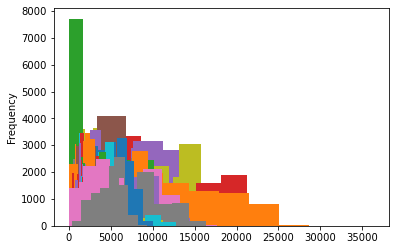

In [36]:
df.groupby(by='stationname')['rides'].plot.hist()

In [94]:
df['year'].max()

2022

In [97]:
df['rides'].describe()

count    1.136863e+06
mean     3.067719e+03
std      3.124920e+03
min      0.000000e+00
25%      9.680000e+02
50%      2.015000e+03
75%      4.040000e+03
max      3.632300e+04
Name: rides, dtype: float64

year
2016    AxesSubplot(0.125,0.125;0.775x0.755)
2017    AxesSubplot(0.125,0.125;0.775x0.755)
2018    AxesSubplot(0.125,0.125;0.775x0.755)
Name: rides, dtype: object

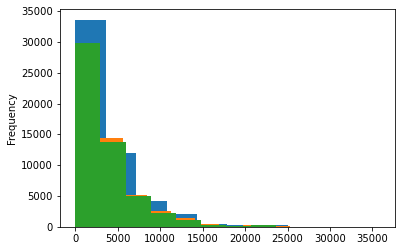

In [117]:
df.query('year > 2015 and year < 2019').groupby(by='year')['rides'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

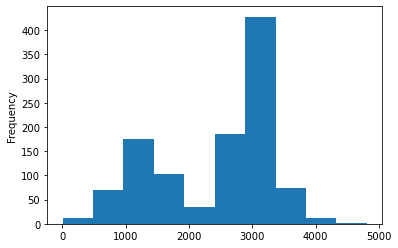

In [131]:
df[df.stationname == "Addison-O'Hare"].query('year > 2015 and year < 2019')['rides'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

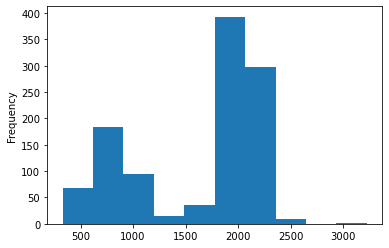

In [133]:
df[df.stationname == "Austin-Forest Park"].query('year > 2015 and year < 2019')['rides'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

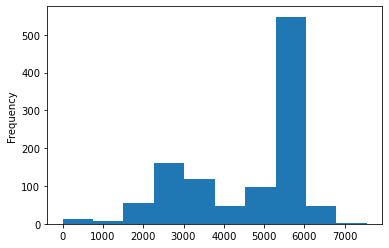

In [134]:
df[df.stationname == "Belmont-O'Hare"].query('year > 2015 and year < 2019')['rides'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

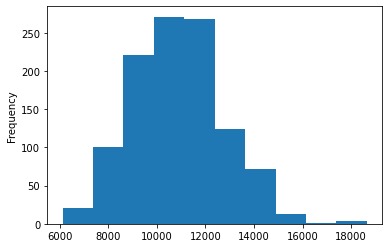

In [136]:
df[df.stationname == "O'Hare Airport"].query('year > 2015 and year < 2019')['rides'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

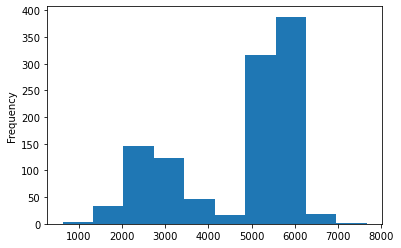

In [160]:
 df[df.stationname == "California/Milwaukee"].query('year > 2015 and year < 2019')['rides'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

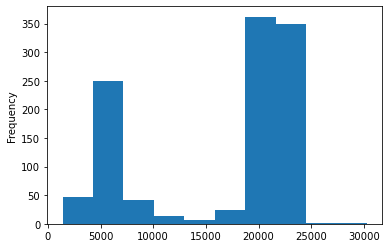

In [161]:
 df[df.stationname == "Clark/Lake"].query('year > 2015 and year < 2019')['rides'].plot.hist()

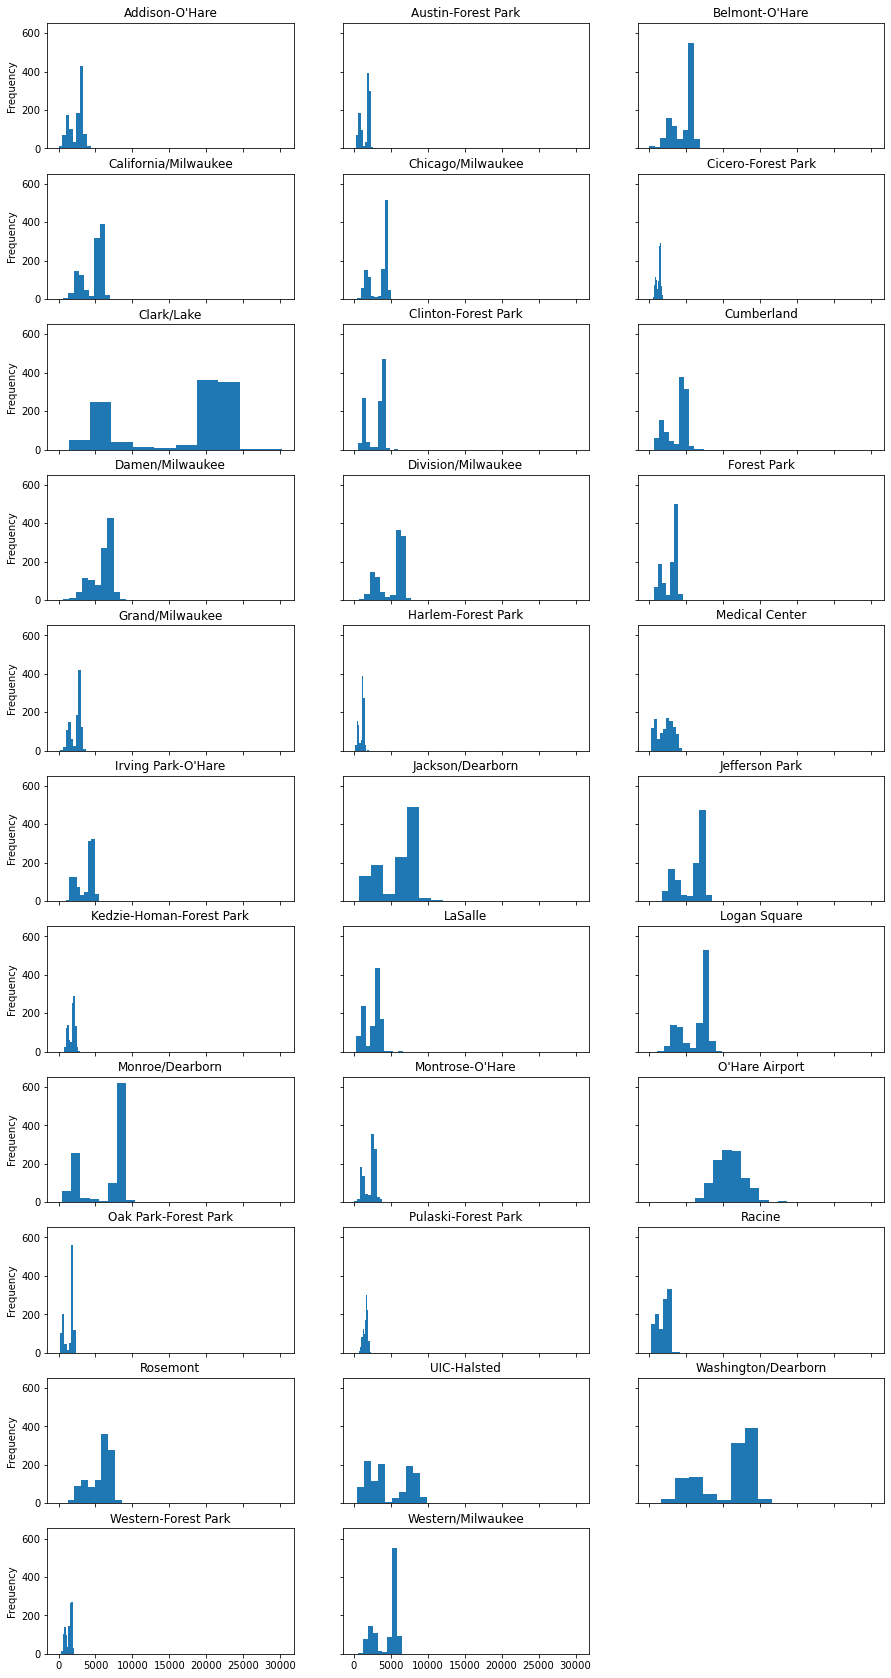

In [159]:
fig, axes = plt.subplots(nrows=11, ncols=3, sharex=True, sharey=True, figsize=(15,30))
axes_list = [item for sublist in axes for item in sublist]

for station in blueLine:
    ax = axes_list.pop(0)
    df[df.stationname == station].query('year > 2015 and year < 2019')['rides'].plot.hist(ax=ax)
    ax.set_title(station)

for ax in axes_list:
    ax.remove()

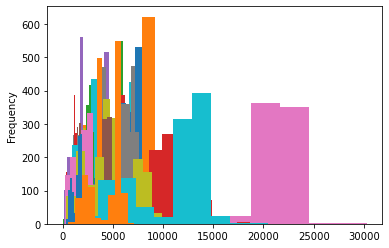

In [162]:
for station in blueLine:
    df[df.stationname == station].query('year > 2015 and year < 2019')['rides'].plot.hist()

In [170]:
rides = 0

for station in blueLine:
    stationRides = df[df.stationname == station].query('year > 2015 and year < 2019')['rides'].mean()
    rides += stationRides
    
totalAvg = rides / len(blueLine)


print(f"An average of {totalAvg} people board at each station on the Blue Line.")

An average of 4313.2729242700725 people board at each station on the Blue Line.


So we have 20 years of data, per station, per day. To understand the distributions, I want to group first by station (obviously), then by day? Do I want to filter out 1 year of data first to avoid conflation with yearly growth? I think I do. I also want to be wary of COVID data--so maybe I take the data from 2019? Or I can do a multi-year average. 

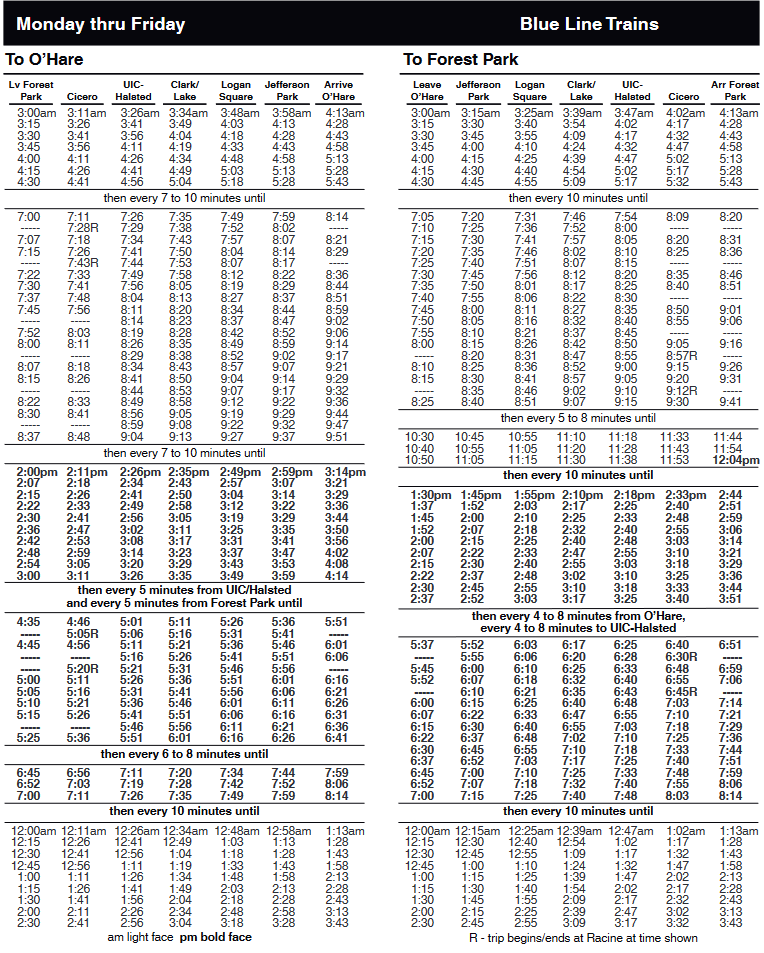

https://en.wikipedia.org/wiki/Blue_Line_(CTA)

In [171]:
totalFP = 0
trainsFP = [7,24,20,39,10,36,11,11,3,30,9]

for train in trainsFP:
    totalFP+=train
    
totalOH = 0
trainsOH = [7,15,17,19,3,16,10,60,14,30,9]

for train in trainsOH:
    totalOH+=train


print(f"Monday through Friday approximately {totalFP} trains leave Forest Park for O'Hare")
print(f"Monday through Friday approximately {totalOH} trains leave O'Hare for Forest Park")

Monday through Friday approximately 200 trains leave Forest Park for O'Hare
Monday through Friday approximately 200 trains leave O'Hare for Forest Park
